<a href="https://colab.research.google.com/github/rlrocha90/TP555_Trabalho1/blob/main/Trabalho1_Exerc%C3%ADcio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lista #12 -> Exercício #22
Classificação Redes MLP

In [1]:
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin, freqz
import matplotlib.pyplot as plt

In [2]:
def createDataset(x, M):
    '''Função que converte o vetor x (Nx1) de entrada em uma matriz NxM+1 seguindo a equação do filtro FIR.'''
    zeros = np.zeros((M,))
    x = np.r_[zeros, x]
    N = len(x)
    X = np.zeros((N-M, M+1))
    for i in range(N-M):
        s = -len(x)+M+i
        e = -len(x)-1+i
        X[i,:] = x[s:e:-1]
    return X

In [3]:
# Define number of samples.
N = 1000

# Time indexes.
n = np.arange(0,N)

# Sampling rate.
fs = 1000.0

# Cutoff frequency of the filter.
fc = 250.0

# Frequency index 0.
k0 = 100

# Frequency index 0.
k1 = 400

# Input signal.
x_fir = np.cos((2*np.pi*k0*n)/N) + np.cos((2*np.pi*k1*n)/N)

In [4]:
# The Nyquist rate of the signal.
nyq_rate = fs/2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate. We'll design the filter
# with a 25 Hz transition width.
width = 50.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 40.0

# Compute the order and Kaiser parameter for the FIR filter.
order, beta = kaiserord(ripple_db, width)

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(order, fc/nyq_rate, window=('kaiser', beta))

print('FIR filter order:', order-1)
print('Number of taps of the FIR filter:', len(taps))
print('FIR taps:', taps)

FIR filter order: 45
Number of taps of the FIR filter: 46
FIR taps: [-0.00147957  0.00196122  0.00252175 -0.0031697  -0.00391484  0.00476859
  0.00574458 -0.00685949 -0.00813413  0.00959513  0.0112774  -0.01322788
 -0.01551144  0.01822048  0.02149142 -0.02553416 -0.03068898  0.03754528
  0.04721871 -0.06210339 -0.0884292   0.14904834  0.44965988  0.44965988
  0.14904834 -0.0884292  -0.06210339  0.04721871  0.03754528 -0.03068898
 -0.02553416  0.02149142  0.01822048 -0.01551144 -0.01322788  0.0112774
  0.00959513 -0.00813413 -0.00685949  0.00574458  0.00476859 -0.00391484
 -0.0031697   0.00252175  0.00196122 -0.00147957]


In [5]:
# Use lfilter to filter y with the FIR filter.
y_fir = lfilter(taps, 1.0, x_fir)
print(y_fir.shape)

(1000,)


In [7]:
X = createDataset(y_fir, order-1)
print(X.shape)
print(X)

(1000, 46)
[[-0.00295914  0.          0.         ...  0.          0.
   0.        ]
 [ 0.00392244 -0.00295914  0.         ...  0.          0.
   0.        ]
 [ 0.00412908  0.00392244 -0.00295914 ...  0.          0.
   0.        ]
 ...
 [-0.95203318 -0.58584044 -0.00254843 ...  0.58996388  0.95045817
   0.95045817]
 [-0.95203318 -0.95203318 -0.58584044 ... -0.00254843  0.58996388
   0.95045817]
 [-0.58584044 -0.95203318 -0.95203318 ... -0.58584044 -0.00254843
   0.58996388]]


In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes':[(1,),(20,)], 'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('lbfgs','sgd','adam')}

regr = MLPRegressor()
clf = GridSearchCV(regr, parameters, scoring='neg_mean_squared_error')
clf.fit(X, y_fir)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to con

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'hidden_layer_sizes': [(1,), (20,)],
                         'solver': ('lbfgs', 'sgd', 'adam')},
             scoring='neg_mean_squared_error')

In [21]:
coef = clf.best_estimator_
print("Melhores parâmetros: ", coef)

Melhores parâmetros:  MLPRegressor(activation='logistic', hidden_layer_sizes=(20,), solver='lbfgs')


In [14]:
from sklearn.metrics import mean_squared_error

y_fir_pred = clf.predict(X)
mse = mean_squared_error(y_fir, y_fir_pred, squared=False)
print(mse)

0.01269737824004108


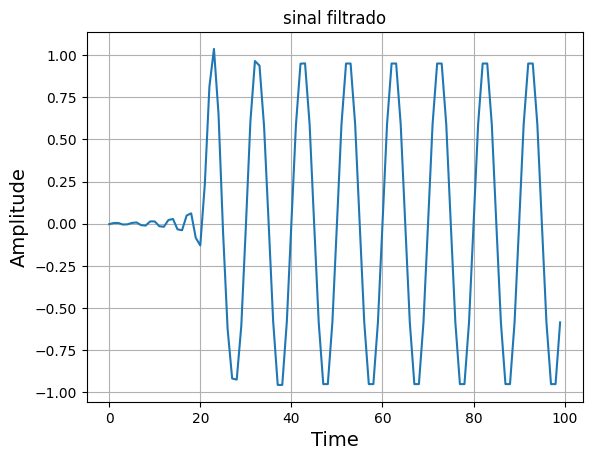

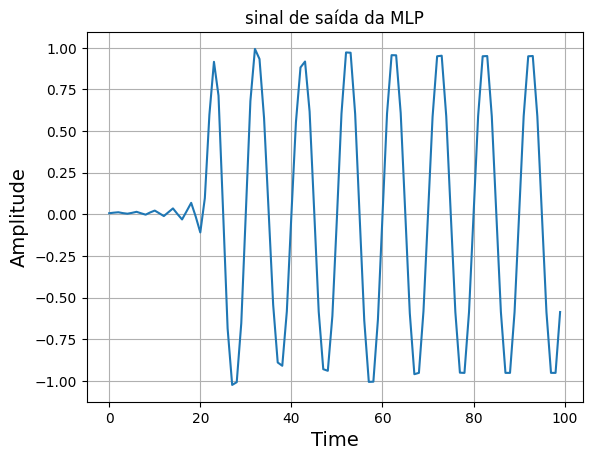

In [18]:
plt.figure()
plt.plot(y_fir[0:100])
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title("sinal filtrado")
plt.grid()
plt.show()

plt.figure()
plt.plot(y_fir_pred[0:100])
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title("sinal de saída da MLP")
plt.grid()
plt.show()

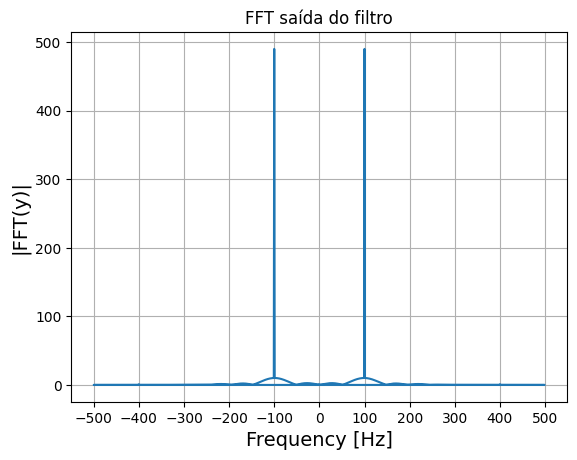

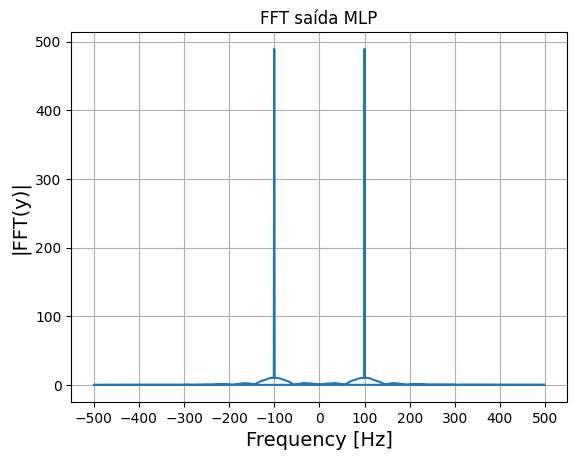

In [19]:
dft_fir = np.fft.fft(y_fir)
freqs = np.fft.fftfreq(N, d=(1.0/(fs)))
dft_fir = dft_fir.reshape(N,)
dft_fir_abs = np.abs(dft_fir)

plt.figure()
plt.plot(freqs, dft_fir_abs)
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('|FFT(y)|', fontsize=14)
plt.xticks(range(-500, 600, 100))
plt.title("FFT saída do filtro")
plt.grid()
plt.show()


dft_fir1 = np.fft.fft(y_fir_pred)
freqs1 = np.fft.fftfreq(N, d=(1.0/(fs)))
dft_fir1 = dft_fir1.reshape(N,)
dft_fir_abs1 = np.abs(dft_fir1)

plt.figure()
plt.plot(freqs1, dft_fir_abs1)
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('|FFT(y)|', fontsize=14)
plt.xticks(range(-500, 600, 100))
plt.title("FFT saída MLP")
plt.grid()
plt.show()

Sim, analisando os resultados, os sinais filtrados pela equação do filtro e pela MLP são similares. No domínio da frequência, o que é o objetivo de um filtro, os sinais são iguais, ou seja, o filtro está funcionando como desejado.